In [1]:
import numpy as np
import cupy as cp
import astropy.units as u
from astropy.io import fits
from matplotlib.patches import Rectangle, Circle
from pathlib import Path
from IPython.display import clear_output
from importlib import reload

import poppy

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = True

import warnings
warnings.filterwarnings("ignore")

from prop_models import coro, agpm
reload(coro)

from wfsc import efc_1dm as efc
from wfsc import utils

import misc_funs as misc
wavelength_c = 750e-9*u.m

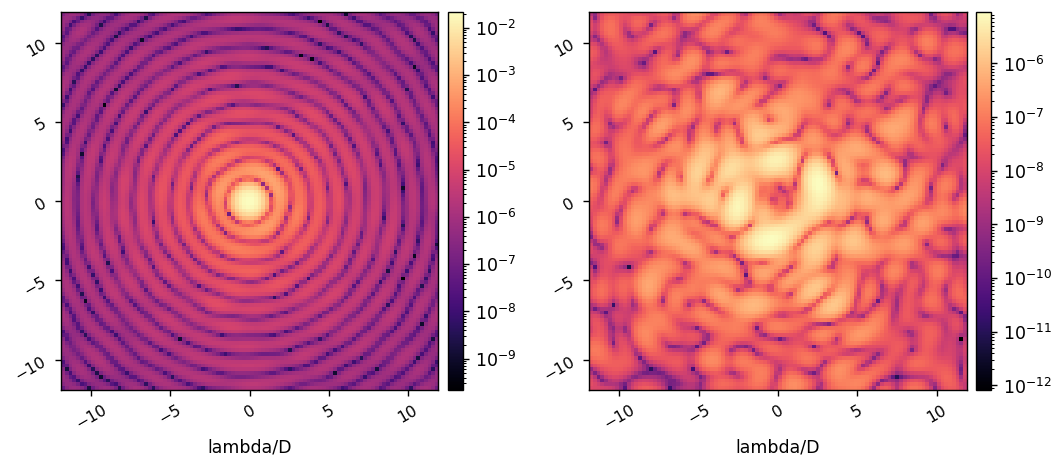

In [2]:
reload(coro)
reload(misc)

vortex = agpm.IdealAGPM(name='VVC', wavelength=wavelength_c, charge=6, singularity=20*u.um)
lyot_stop = poppy.CircularAperture(name='Lyot Stop', radius=3*u.mm, gray_pixel=False)

c = coro.CORO(dm_inf='inf.fits',
              npix=128,
              oversample=16,
              npsf=100,
              use_opds=True,
              LYOT=lyot_stop
             )
c.FPM = poppy.ScalarTransmission()
im_unocc = c.snap()

c.FPM = vortex
ref_im = c.snap()

misc.imshow2(im_unocc, ref_im, 
               lognorm1=True, lognorm2=True,
               pxscl1=c.psf_pixelscale_lamD, pxscl2=c.psf_pixelscale_lamD)

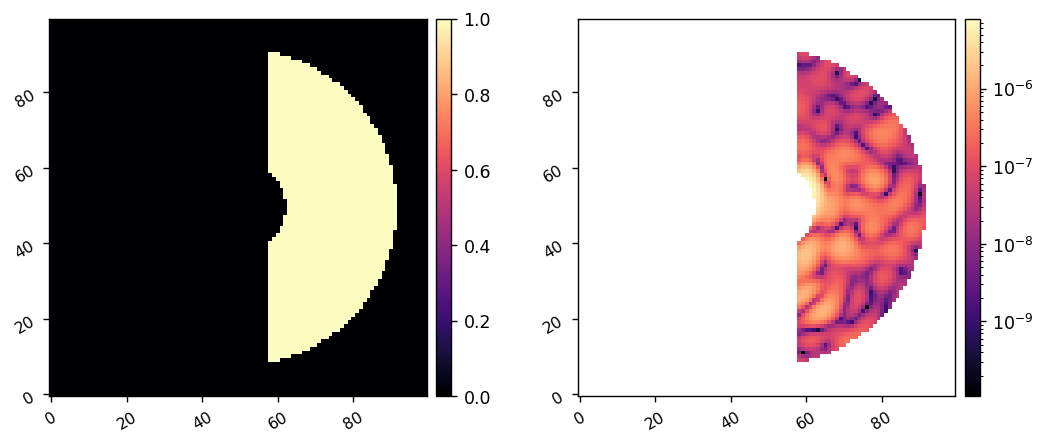

In [7]:
reload(utils)
npsf = c.npsf
nact = c.Nact

xfp = (np.linspace(-npsf/2, npsf/2-1, npsf) + 1/2)*c.psf_pixelscale_lamD
fpx,fpy = np.meshgrid(xfp,xfp)

edge = 2
iwa = 3
owa = 10
rot = 0

# Create the mask that is used to select which region to make dark.
dark_params = {
    'inner_radius' : iwa,
    'outer_radius' : owa,
    'edge_position' : edge,
    'direction' : '+x',
    'rotation':rot,
    'full': False
}
dark_mask = utils.create_annular_focal_plane_mask(fpx, fpy, dark_params)
misc.imshow2(dark_mask, dark_mask*ref_im, lognorm2=True)

In [8]:
reload(efc)

epsilon = 1e-9 # poke amplitudes (DM surface)
jac = efc.build_jacobian(c, epsilon, dark_mask.flatten(), display=False)

Building Jacobian.
	Calculated response for mode 1/952. Elapsed time=1.508 sec.
	Calculated response for mode 2/952. Elapsed time=2.638 sec.
	Calculated response for mode 3/952. Elapsed time=3.769 sec.
	Calculated response for mode 4/952. Elapsed time=4.888 sec.
	Calculated response for mode 5/952. Elapsed time=6.040 sec.
	Calculated response for mode 6/952. Elapsed time=7.194 sec.
	Calculated response for mode 7/952. Elapsed time=8.342 sec.
	Calculated response for mode 8/952. Elapsed time=9.473 sec.
	Calculated response for mode 9/952. Elapsed time=10.581 sec.
	Calculated response for mode 10/952. Elapsed time=11.713 sec.
	Calculated response for mode 11/952. Elapsed time=12.841 sec.
	Calculated response for mode 12/952. Elapsed time=13.973 sec.
	Calculated response for mode 13/952. Elapsed time=15.106 sec.
	Calculated response for mode 14/952. Elapsed time=16.240 sec.
	Calculated response for mode 15/952. Elapsed time=17.379 sec.
	Calculated response for mode 16/952. Elapsed time=18

	Calculated response for mode 130/952. Elapsed time=148.677 sec.
	Calculated response for mode 131/952. Elapsed time=149.797 sec.
	Calculated response for mode 132/952. Elapsed time=150.932 sec.
	Calculated response for mode 133/952. Elapsed time=152.061 sec.
	Calculated response for mode 134/952. Elapsed time=153.196 sec.
	Calculated response for mode 135/952. Elapsed time=154.324 sec.
	Calculated response for mode 136/952. Elapsed time=155.451 sec.
	Calculated response for mode 137/952. Elapsed time=156.568 sec.
	Calculated response for mode 138/952. Elapsed time=157.686 sec.
	Calculated response for mode 139/952. Elapsed time=158.813 sec.
	Calculated response for mode 140/952. Elapsed time=159.941 sec.
	Calculated response for mode 141/952. Elapsed time=161.070 sec.
	Calculated response for mode 142/952. Elapsed time=162.203 sec.
	Calculated response for mode 143/952. Elapsed time=163.333 sec.
	Calculated response for mode 144/952. Elapsed time=164.447 sec.
	Calculated response for 

	Calculated response for mode 257/952. Elapsed time=291.693 sec.
	Calculated response for mode 258/952. Elapsed time=292.813 sec.
	Calculated response for mode 259/952. Elapsed time=293.943 sec.
	Calculated response for mode 260/952. Elapsed time=295.071 sec.
	Calculated response for mode 261/952. Elapsed time=296.200 sec.
	Calculated response for mode 262/952. Elapsed time=297.323 sec.
	Calculated response for mode 263/952. Elapsed time=298.453 sec.
	Calculated response for mode 264/952. Elapsed time=299.570 sec.
	Calculated response for mode 265/952. Elapsed time=300.683 sec.
	Calculated response for mode 266/952. Elapsed time=301.800 sec.
	Calculated response for mode 267/952. Elapsed time=302.926 sec.
	Calculated response for mode 268/952. Elapsed time=304.049 sec.
	Calculated response for mode 269/952. Elapsed time=305.179 sec.
	Calculated response for mode 270/952. Elapsed time=306.303 sec.
	Calculated response for mode 271/952. Elapsed time=307.436 sec.
	Calculated response for 

	Calculated response for mode 384/952. Elapsed time=437.671 sec.
	Calculated response for mode 385/952. Elapsed time=438.849 sec.
	Calculated response for mode 386/952. Elapsed time=440.032 sec.
	Calculated response for mode 387/952. Elapsed time=441.268 sec.
	Calculated response for mode 388/952. Elapsed time=442.541 sec.
	Calculated response for mode 389/952. Elapsed time=443.770 sec.
	Calculated response for mode 390/952. Elapsed time=444.993 sec.
	Calculated response for mode 391/952. Elapsed time=446.125 sec.
	Calculated response for mode 392/952. Elapsed time=447.272 sec.
	Calculated response for mode 393/952. Elapsed time=448.397 sec.
	Calculated response for mode 394/952. Elapsed time=449.521 sec.
	Calculated response for mode 395/952. Elapsed time=450.761 sec.
	Calculated response for mode 396/952. Elapsed time=452.084 sec.
	Calculated response for mode 397/952. Elapsed time=453.273 sec.
	Calculated response for mode 398/952. Elapsed time=454.397 sec.
	Calculated response for 

	Calculated response for mode 511/952. Elapsed time=582.737 sec.
	Calculated response for mode 512/952. Elapsed time=583.874 sec.
	Calculated response for mode 513/952. Elapsed time=585.006 sec.
	Calculated response for mode 514/952. Elapsed time=586.139 sec.
	Calculated response for mode 515/952. Elapsed time=587.268 sec.
	Calculated response for mode 516/952. Elapsed time=588.398 sec.
	Calculated response for mode 517/952. Elapsed time=589.513 sec.
	Calculated response for mode 518/952. Elapsed time=590.640 sec.
	Calculated response for mode 519/952. Elapsed time=591.762 sec.
	Calculated response for mode 520/952. Elapsed time=592.889 sec.
	Calculated response for mode 521/952. Elapsed time=594.022 sec.
	Calculated response for mode 522/952. Elapsed time=595.157 sec.
	Calculated response for mode 523/952. Elapsed time=596.288 sec.
	Calculated response for mode 524/952. Elapsed time=597.419 sec.
	Calculated response for mode 525/952. Elapsed time=598.539 sec.
	Calculated response for 

	Calculated response for mode 638/952. Elapsed time=726.118 sec.
	Calculated response for mode 639/952. Elapsed time=727.244 sec.
	Calculated response for mode 640/952. Elapsed time=728.374 sec.
	Calculated response for mode 641/952. Elapsed time=729.497 sec.
	Calculated response for mode 642/952. Elapsed time=730.681 sec.
	Calculated response for mode 643/952. Elapsed time=731.833 sec.
	Calculated response for mode 644/952. Elapsed time=732.982 sec.
	Calculated response for mode 645/952. Elapsed time=734.140 sec.
	Calculated response for mode 646/952. Elapsed time=735.386 sec.
	Calculated response for mode 647/952. Elapsed time=736.788 sec.
	Calculated response for mode 648/952. Elapsed time=738.266 sec.
	Calculated response for mode 649/952. Elapsed time=739.718 sec.
	Calculated response for mode 650/952. Elapsed time=741.211 sec.
	Calculated response for mode 651/952. Elapsed time=742.730 sec.
	Calculated response for mode 652/952. Elapsed time=744.172 sec.
	Calculated response for 

	Calculated response for mode 765/952. Elapsed time=873.740 sec.
	Calculated response for mode 766/952. Elapsed time=874.888 sec.
	Calculated response for mode 767/952. Elapsed time=876.040 sec.
	Calculated response for mode 768/952. Elapsed time=877.187 sec.
	Calculated response for mode 769/952. Elapsed time=878.309 sec.
	Calculated response for mode 770/952. Elapsed time=879.429 sec.
	Calculated response for mode 771/952. Elapsed time=880.551 sec.
	Calculated response for mode 772/952. Elapsed time=881.679 sec.
	Calculated response for mode 773/952. Elapsed time=882.829 sec.
	Calculated response for mode 774/952. Elapsed time=883.977 sec.
	Calculated response for mode 775/952. Elapsed time=885.126 sec.
	Calculated response for mode 776/952. Elapsed time=886.274 sec.
	Calculated response for mode 777/952. Elapsed time=887.418 sec.
	Calculated response for mode 778/952. Elapsed time=888.543 sec.
	Calculated response for mode 779/952. Elapsed time=889.666 sec.
	Calculated response for 

	Calculated response for mode 891/952. Elapsed time=1017.679 sec.
	Calculated response for mode 892/952. Elapsed time=1018.830 sec.
	Calculated response for mode 893/952. Elapsed time=1019.978 sec.
	Calculated response for mode 894/952. Elapsed time=1021.127 sec.
	Calculated response for mode 895/952. Elapsed time=1022.258 sec.
	Calculated response for mode 896/952. Elapsed time=1023.381 sec.
	Calculated response for mode 897/952. Elapsed time=1024.511 sec.
	Calculated response for mode 898/952. Elapsed time=1025.633 sec.
	Calculated response for mode 899/952. Elapsed time=1026.760 sec.
	Calculated response for mode 900/952. Elapsed time=1027.908 sec.
	Calculated response for mode 901/952. Elapsed time=1029.056 sec.
	Calculated response for mode 902/952. Elapsed time=1030.207 sec.
	Calculated response for mode 903/952. Elapsed time=1031.353 sec.
	Calculated response for mode 904/952. Elapsed time=1032.474 sec.
	Calculated response for mode 905/952. Elapsed time=1033.596 sec.
	Calculate

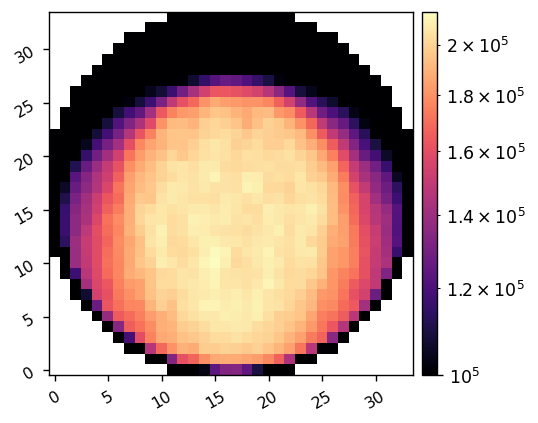

In [16]:
reload(utils)
response = utils.map_acts_to_dm(np.sqrt(((jac)**2).sum(axis=0)), c.dm_mask)
misc.imshow1(response, lognorm=True, vmin=1e5)

In [17]:
reload(utils)
reg_fun = utils.beta_reg
reg_conds = np.array([[0, 20, 25, 35, 40],
                      [-2, -4, -2, -3, -2]])

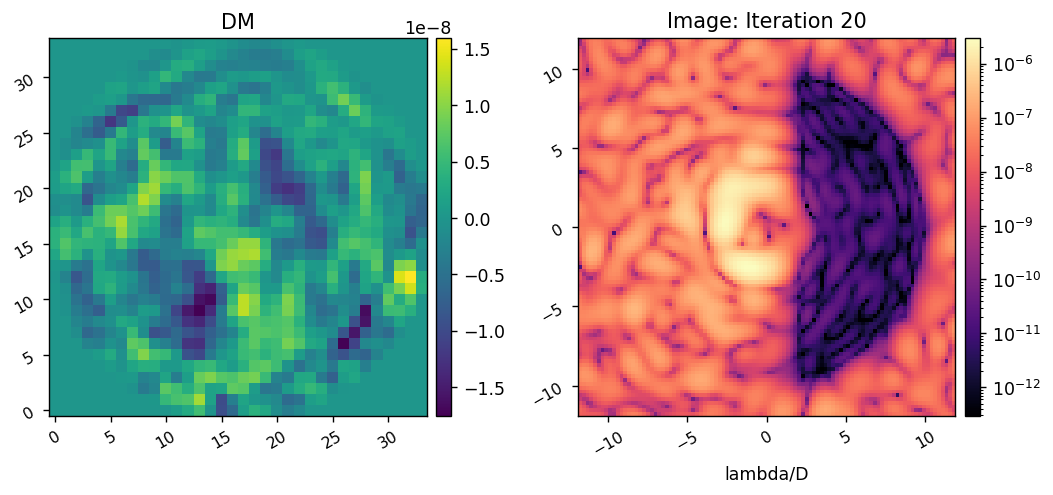

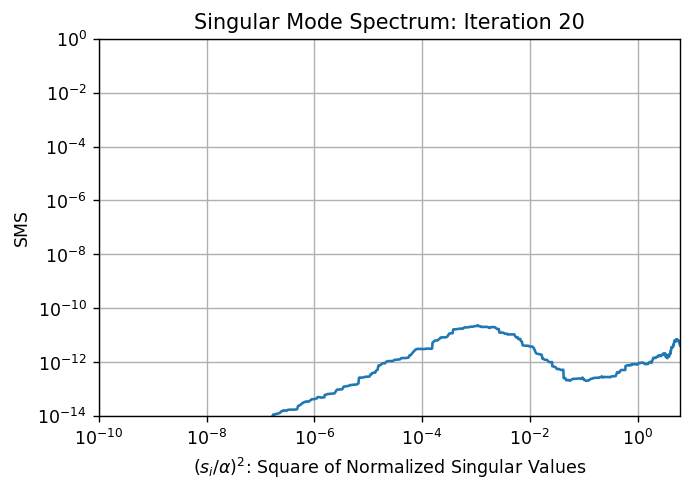

EFC completed in 25.239 sec.


In [23]:
reload(efc)
reload(utils)
c.reset_dm()
commands1, efields1 = efc.run_efc_perfect(c,
                                         jac,
                                         reg_fun,
                                         reg_conds,
                                         dark_mask, 
                                         im_unocc.max(),
                                         iterations=20, 
                                         display_current=True, 
#                                           display_all=True,
                                         plot_sms=True)